True


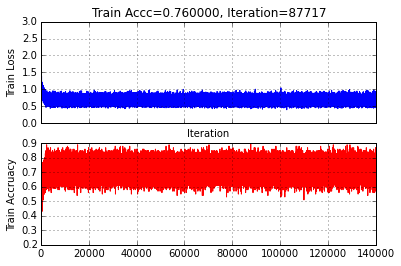

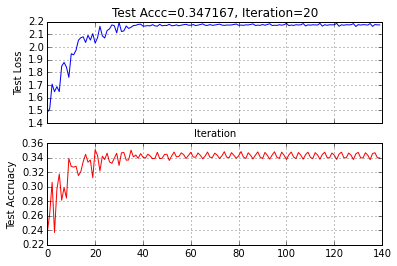

In [19]:
import sys
import glob 
import os

#Find out parameter with the lowest loss
READ=True
cur_num=0
cur_num += 1
#log_file='/scr/r6/tgebru/timnit_caffe/timnit_models/invert_content_loss/timelapse.log'
log_file='/scr/r6/tgebru/timnit_caffe/timnit_models/ny_housing/classify/log.log'
#log_file='/scr/r6/tgebru/timnit_caffe/timnit_models/ny_housing/classify_norm/log.log'

#print 'processing %d out of %d'%(cur_num,numlogs)
try:
    log_handle = open(log_file, 'r')
    READ=True
except:
    READ=False
    pass
print READ
if READ:
    trainIter = []
    trainLoss = []
    trainAcc  = []

    testIter = []
    testAcc  = []
    testLoss = []

    iteration = 0 
    testing = False
    testIt = 0
    for line in log_handle:
        #Testing 
        if 'Testing' in line:
            testIter.append(testIt)
            testIt += 1       
        elif 'Test net output' in line and 'loss' in line:
            loss=line.strip().split('=')[-1].strip().split(' ')[0]
            testLoss.append(loss)  
        elif 'Test net output' in line and 'accuracy' in line:
            acc=line.strip().split('=')[-1]
            testAcc.append(float(acc))
        #Training
        elif'Iteration' in line and 'loss' in line:
            loss=line.strip().split('=')[-1]
            trainIter.append(iteration) 
            trainLoss.append(loss)
            iteration += 1
           
        elif 'Train net output' in line and 'accuracy' in line:
            acc=line.strip().split('=')[-1].strip() 
            trainAcc.append(float(acc))
    log_handle.close()
    
# visualize loss
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, sharex=True)
ax1=ax[0]
ax2=ax[1]
lns1 = ax1.plot(trainIter[:140000], trainLoss[:140000], 'b', label = 'Training loss')
lns2 = ax2.plot(trainIter[:140000], trainAcc[:140000], 'r', label = 'Testing loss')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Train Loss')
ax2.set_ylabel('Train Accruacy')
maxTrainAcc=np.array(trainAcc)[140000]#.max()
maxTrainIter=np.where(trainAcc==np.array(trainAcc).max())[-1][0]
ax1.set_title('Train Accc=%f, Iteration=%d'%(maxTrainAcc, maxTrainIter))
lns = lns1
labs = [l.get_label() for l in lns]
ax1.grid()
ax2.grid()

plt.show()

fig, ax = plt.subplots(2, sharex=True)
ax1=ax[0]
ax2=ax[1]
lns1 = ax1.plot(testIter[:140], testLoss[:140], 'b', label = 'Testing loss')
lns2 = ax2.plot(testIter[:140], testAcc[:140], 'r', label = 'Testing loss')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Test Loss')
ax2.set_ylabel('Test Accruacy')
maxTestAcc=np.array(testAcc)[140]#.max()
maxTestIter=np.where(testAcc==np.array(testAcc).max())[-1][0]
ax1.set_title('Test Accc=%f, Iteration=%d'%(maxTestAcc,maxTestIter))
lns = lns1
labs = [l.get_label() for l in lns]
ax1.grid()
ax2.grid()

plt.show()
save_dir='./loss_plots/'
img_file=os.path.join(save_dir,log_file.split('.')[0])
fig.savefig(img_file, bbox_inches='tight')